Notebook with a correlation analysis of the probabilities from this study and p-values obtained in a previous study based on GO terms.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr
from tqdm.auto import tqdm

In [2]:
tqdm.pandas()

In [3]:
df = pd.read_csv('results.csv')
df = df.rename(columns={'p': 'proba'})
df

,Gen,Phn,proba
0,ERCC1,D1071,0.999487
1,DDX54,D1071,0.988706
2,SNCAIP,D1071,0.837623
3,DNMT3A,D1071,0.943749
4,PAICS,D1071,0.666698
...,...,...,...
965803,ITPKB,D1158,0.000000
965804,Mar-05,D1158,0.000000
965805,MORF4,D1158,0.000000
965806,STK32C,D1158,0.000000


In [4]:
pval = pd.read_csv('data/PvalGenFrm.csv', index_col=0)
pval

,C1007,C1010,C1052,C1067,C1068,C1069,C1080,D1071,D1072,D1073,...,D1720,D1725,H3000,L2000,L2001,L2002,L2003,L2004,L2005,L2006
A1BG,0.015260,0.033936,0.024465,0.009954,0.017598,0.016716,0.000394,0.033000,4.200000e-03,0.0059,...,0.0320,0.0520,0.004130,0.00110,0.00430,0.02700,0.0150,0.00025,0.00099,0.00690
A1BG-AS1,0.107584,0.033936,0.054779,0.009954,0.017598,0.010538,0.010430,0.033000,4.200000e-03,0.0059,...,0.0430,0.0520,0.004130,0.00110,0.00430,0.02700,0.0150,0.00034,0.00099,0.00690
A1CF,0.002029,0.001396,0.005065,0.011311,0.037745,0.028450,0.000009,0.004800,6.400000e-03,0.0110,...,0.0120,0.0027,0.000314,0.00380,0.00180,0.02500,0.0025,0.00150,0.00530,0.00920
A2M,0.037412,0.007708,0.012106,0.020634,0.000364,0.004140,0.010497,0.012000,2.400000e-06,0.0061,...,0.0200,0.0110,0.012417,0.00094,0.00130,0.00730,0.0015,0.00540,0.00490,0.00062
A2M-AS1,0.090107,0.007708,0.012106,0.073386,0.000364,0.006357,0.026469,0.034000,2.500000e-07,0.0066,...,0.0200,0.0110,0.012417,0.00460,0.00130,0.00730,0.0033,0.00540,0.00490,0.00120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11AP1,0.032217,0.008297,0.095441,0.268324,0.001759,0.008430,0.223344,0.036000,6.700000e-02,0.0210,...,0.1800,0.1000,0.022594,0.04600,0.03700,0.02300,0.0340,0.01800,0.03400,0.01200
ZYG11B,0.006403,0.004135,0.003707,0.000950,0.013315,0.028952,0.028226,0.000250,4.900000e-02,0.0160,...,0.0086,0.0020,0.001245,0.00700,0.00120,0.00700,0.0019,0.00490,0.00160,0.00053
ZYXP1,0.004447,0.039029,0.021930,0.034819,0.009717,0.037183,0.004327,0.018000,1.000000e-03,0.0180,...,0.2100,0.1000,0.051050,0.06600,0.02400,0.00018,0.0071,0.00110,0.00310,0.03700
ZZEF1,0.011385,0.015092,0.001959,0.008431,0.007263,0.005147,0.001542,0.000039,8.000000e-03,0.0011,...,0.0024,0.0230,0.001294,0.00098,0.00064,0.00180,0.0022,0.00470,0.00065,0.00028


In [5]:
def map_pval(row):
    gen = row['Gen']
    phn = row['Phn']
    
    try:
        return -np.log10(pval.loc[gen][phn])
    except:
        return np.nan

In [6]:
df['-log10(p-val)'] = df.progress_apply(map_pval, axis=1)

  0%|          | 0/965808 [00:00<?, ?it/s]

In [7]:
df

,Gen,Phn,proba,-log10(p-val)
0,ERCC1,D1071,0.999487,60.552842
1,DDX54,D1071,0.988706,17.522879
2,SNCAIP,D1071,0.837623,11.187087
3,DNMT3A,D1071,0.943749,8.070581
4,PAICS,D1071,0.666698,8.091515
...,...,...,...,...
965803,ITPKB,D1158,0.000000,2.207608
965804,Mar-05,D1158,0.000000,NaN
965805,MORF4,D1158,0.000000,NaN
965806,STK32C,D1158,0.000000,2.853872


In [8]:
df = df.dropna()
df

,Gen,Phn,proba,-log10(p-val)
0,ERCC1,D1071,0.999487,60.552842
1,DDX54,D1071,0.988706,17.522879
2,SNCAIP,D1071,0.837623,11.187087
3,DNMT3A,D1071,0.943749,8.070581
4,PAICS,D1071,0.666698,8.091515
...,...,...,...,...
965799,AGMO,D1158,0.000000,2.292430
965801,CYP2J2,D1158,0.000000,1.657577
965803,ITPKB,D1158,0.000000,2.207608
965806,STK32C,D1158,0.000000,2.853872


<AxesSubplot:xlabel='proba', ylabel='-log10(p-val)'>

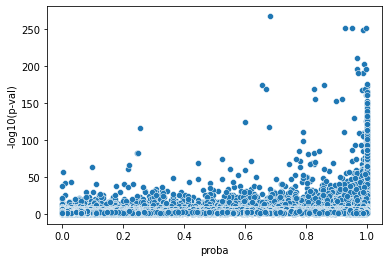

In [9]:
sns.scatterplot(data=df, x='proba', y='-log10(p-val)')

In [10]:
pearsonr(df['proba'], df['-log10(p-val)'])

(0.2529894779401817, 0.0)

In [11]:
for phn in df['Phn'].unique():
    dx = df[df['Phn'] == phn]
    corr = np.corrcoef(dx['proba'], dx['-log10(p-val)'])[0, 1]
    
    print(phn, corr)

D1071 0.20502995868672358
D1536 0.12530785122944854
D1251 0.35998467748147045
D1249 0.37619424399015067
D1526 0.09242225944962613
D1091 0.22377291256735346
D1092 0.18372311803572713
D1082 0.19908541503965363
L2001 0.17074851482001138
L2005 0.20102125010914168
D1112 0.20483996567309035
D1111 0.2448413039095092
D1085 0.21623936357191884
D1245 0.20171848949954832
D1075 0.42265445564485327
D1183 0.16261179770615944
D1182 0.16438606893414323
D1156 0.17667579091267083
D1248 0.024933393938955127
C1007 -0.018830673723537868
D1525 0.047205447253690254
D1077 0.23956411843175346
D1321 0.36005076217071336
C1010 0.28040660520402916
C1068 0.329197055615116
C1069 0.32489306250841127
D1250 0.41423827325762036
D1416 0.4323223718083114
D1153 0.4321096354674433
D1524 0.2936029340162865
D1269 0.38539509345247774
D1284 0.3261290662817021
D1523 0.286528531363744
D1537 0.4675452321026541
D1320 0.19222813121103174
D1155 0.41841807167740275
L2003 0.1928330540793643
D1159 0.4593614207337004
D1268 0.137205113283

<AxesSubplot:>

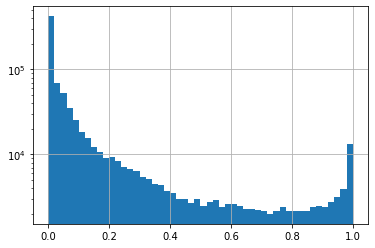

In [12]:
df['proba'].hist(bins=50, log=True)

<AxesSubplot:>

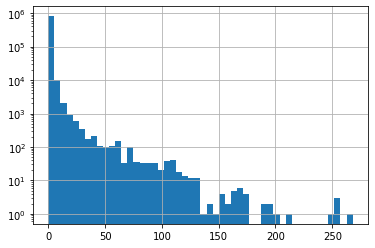

In [13]:
df['-log10(p-val)'].hist(bins=50, log=True)